# SALARY PREDICTION USING LINEAR REGRESSION MODEL

### The dataset was downloaded from kaggle.

### About Dataset
This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

Columns:

Age: This column represents the age of each employee in years. The values in this column are numeric.

Gender: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

Education Level: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

Job Title: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

Years of Experience: This column represents the number of years of work experience of each employee. The values in this column are numeric.

Salary: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

** The purpose of creating this dataset is solely for educational use, and any commercial use is strictly prohibited
and this dataset was large language models generated and not collected from actual data sources.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# data collection

salary = pd.read_csv("data/Salary Data.csv")
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
# Explore the dataset
# 1. Check the first few rows of the dataset
salary.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
# 2. Check the data types and missing values
print(salary.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


In [8]:
# 3. Check the data to know if it contains null values
salary.isnull()
salary.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [9]:
# drop nulls value
salary.isnull().sum()
salary = salary.dropna()
salary.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
# get the current number of colums and rows after dropping null value
salary.shape

(373, 6)

In [11]:
# 4. Summary statistics
salary.describe()


,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


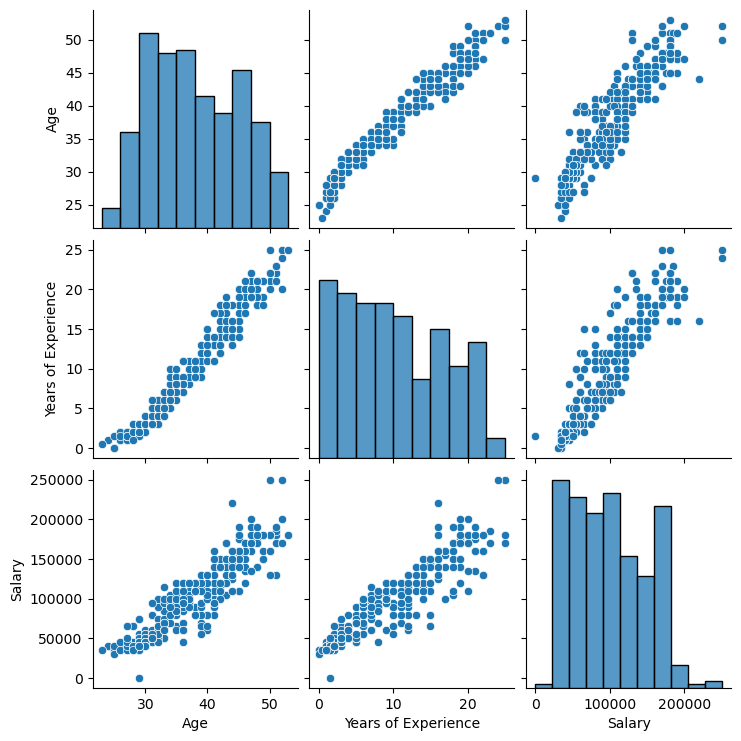

In [12]:
# Data Visualization
# 5. Visualize the distribution of numerical features
numerical_features = ['Age', 'Years of Experience', 'Salary']
sns.pairplot(salary[numerical_features])
plt.show()


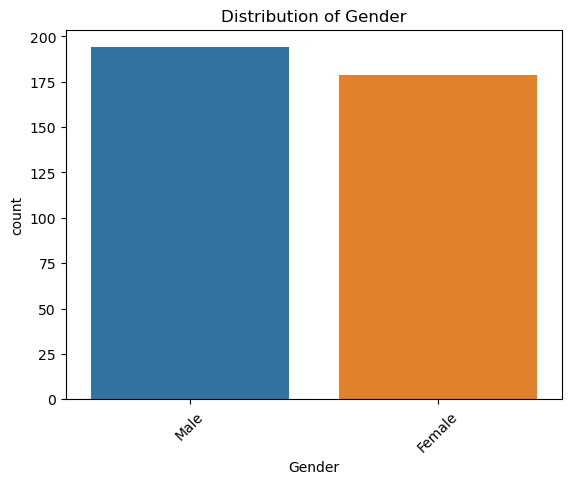

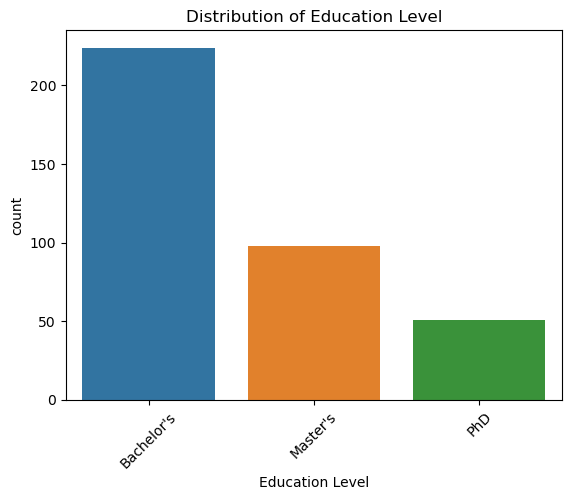

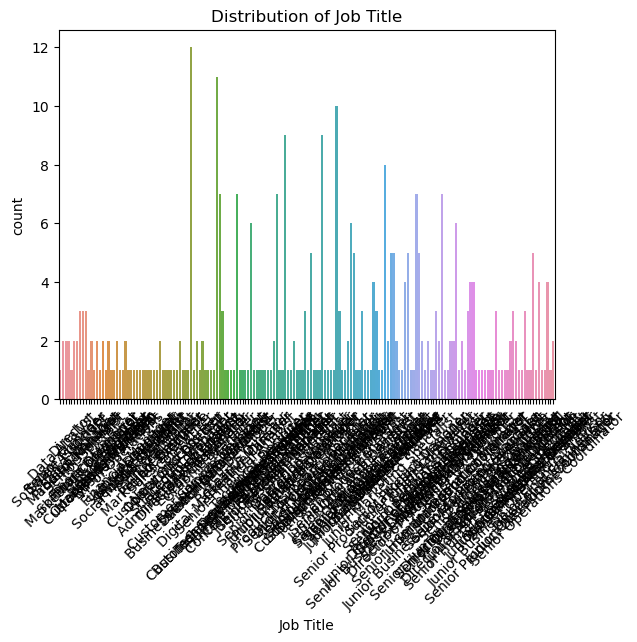

In [14]:

# 6. Visualize the distribution of categorical features
categorical_features = ['Gender', 'Education Level', 'Job Title']
for feature in categorical_features:
    sns.countplot(x=feature, data=salary)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()


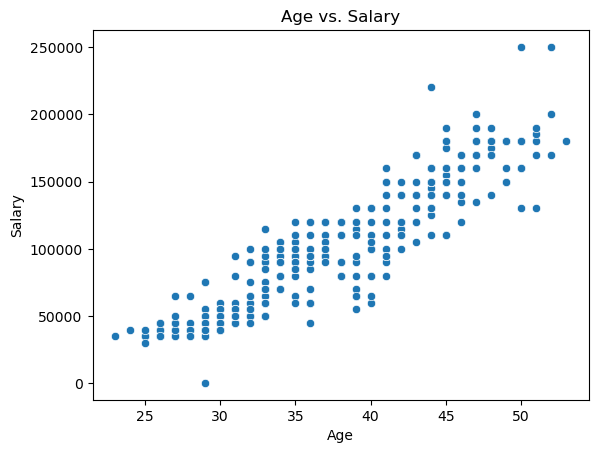

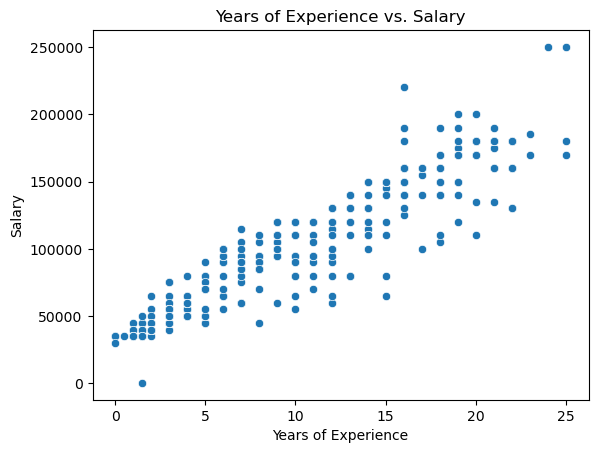

In [15]:
# 7. Explore the relationship between numerical features and salary
for feature in numerical_features[:-1]:
    sns.scatterplot(x=feature, y='Salary', data=salary)
    plt.title(f'{feature} vs. Salary')
    plt.show()

In [20]:
# Linear Regression
# 8. Prepare the data for modeling
X = salary[['Age', 'Years of Experience']]
y = salary['Salary']

In [21]:
# 9. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# 10. Create and fit the linear regression model
salary_model = LinearRegression()
salary_model.fit(X_train, y_train)

LinearRegression()

In [25]:
# 11. Make predictions on the test set
y_pred = salary_model.predict(X_test)


In [26]:
# 12. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 12358.46399897806
Mean Squared Error (MSE): 267299022.8607745
R-squared (R2): 0.8885130944068205


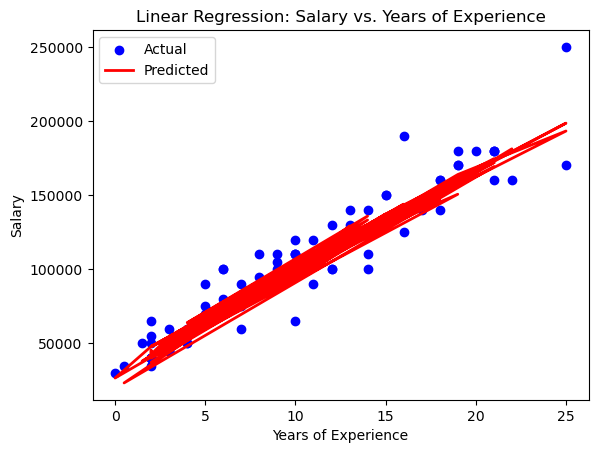

In [27]:
# 13. Visualize the regression line
plt.scatter(X_test['Years of Experience'], y_test, color='blue', label='Actual')
plt.plot(X_test['Years of Experience'], y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Linear Regression: Salary vs. Years of Experience')
plt.show()